## House Price Prediction - Part 1

### Supervised Machine Learning : Regression 


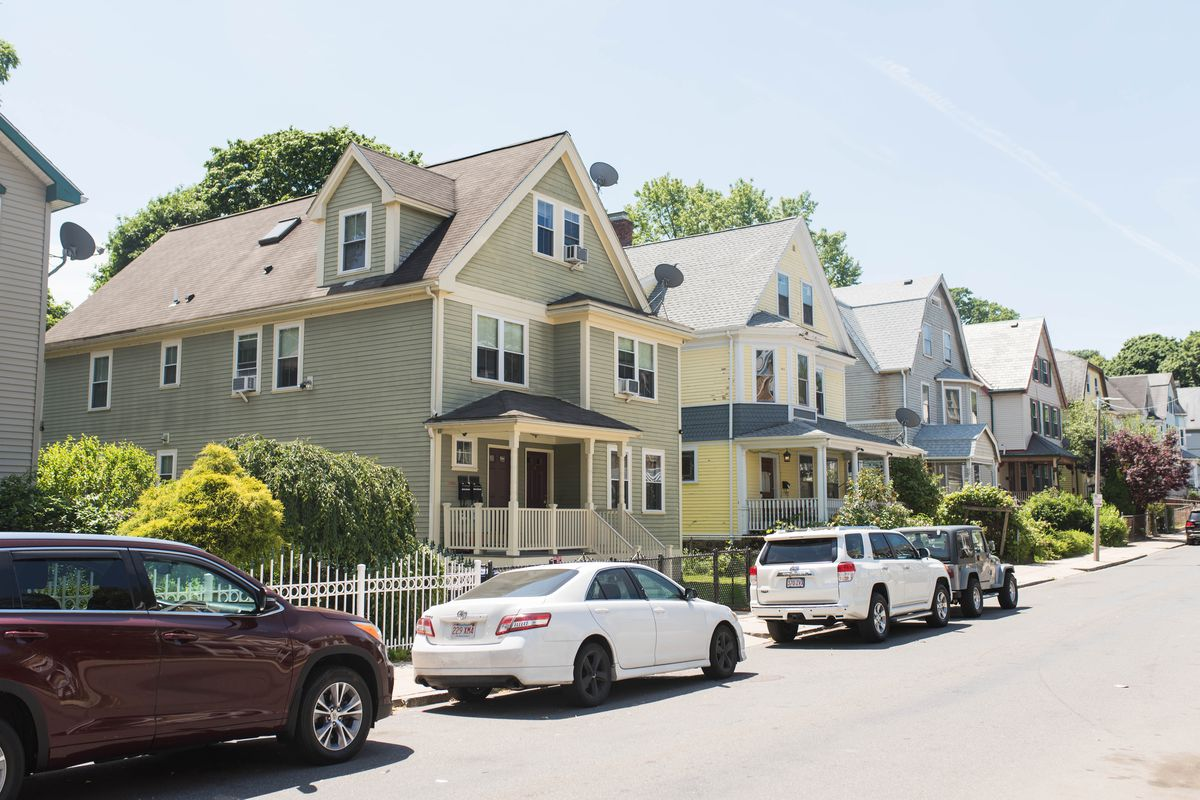

### 1.1 Introduction and Overview

### Objective: 




* The goal of this project is to develop a machine learning model that can accurately predict the sale prices of houses based on relevant features. This prediction will assist potential buyers and sellers in making informed decisions about real estate transactions. 

* By leveraging historical data on housing attributes, such as square footage, number of bedrooms, location, and other relevant factors, the model aims to provide reliable estimates of house prices in a given market. 

* The ultimate aim is to create a tool that enhances transparency and efficiency in the real estate market.


### Data source: Kaggle

### Description :  To predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

### 1.2 Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

### 1.3 Data Preprocessing 

In [2]:
# Loading Dataset

df = pd.read_csv('Housing.csv')

In [3]:
# Accessing the top 5 records

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
# Accessing the last 5 records

df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [5]:
# Total no of records available( 545 incidents and 13 columns)

df.shape

(545, 13)

In [6]:
# No. of columns

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
# Basic info of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 1.4 Data Cleaning and EDA

In [8]:
# Checking for Null Values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# Checking for duplicates

df.duplicated().sum()

0

#### Analysing the Features one by one

#### Grouping the Numerical and Categorical data seperately

In [10]:
Numerical = df.select_dtypes(exclude="object").columns
Numerical

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

In [11]:
Categorical = df.select_dtypes(exclude='int64').columns
Categorical

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

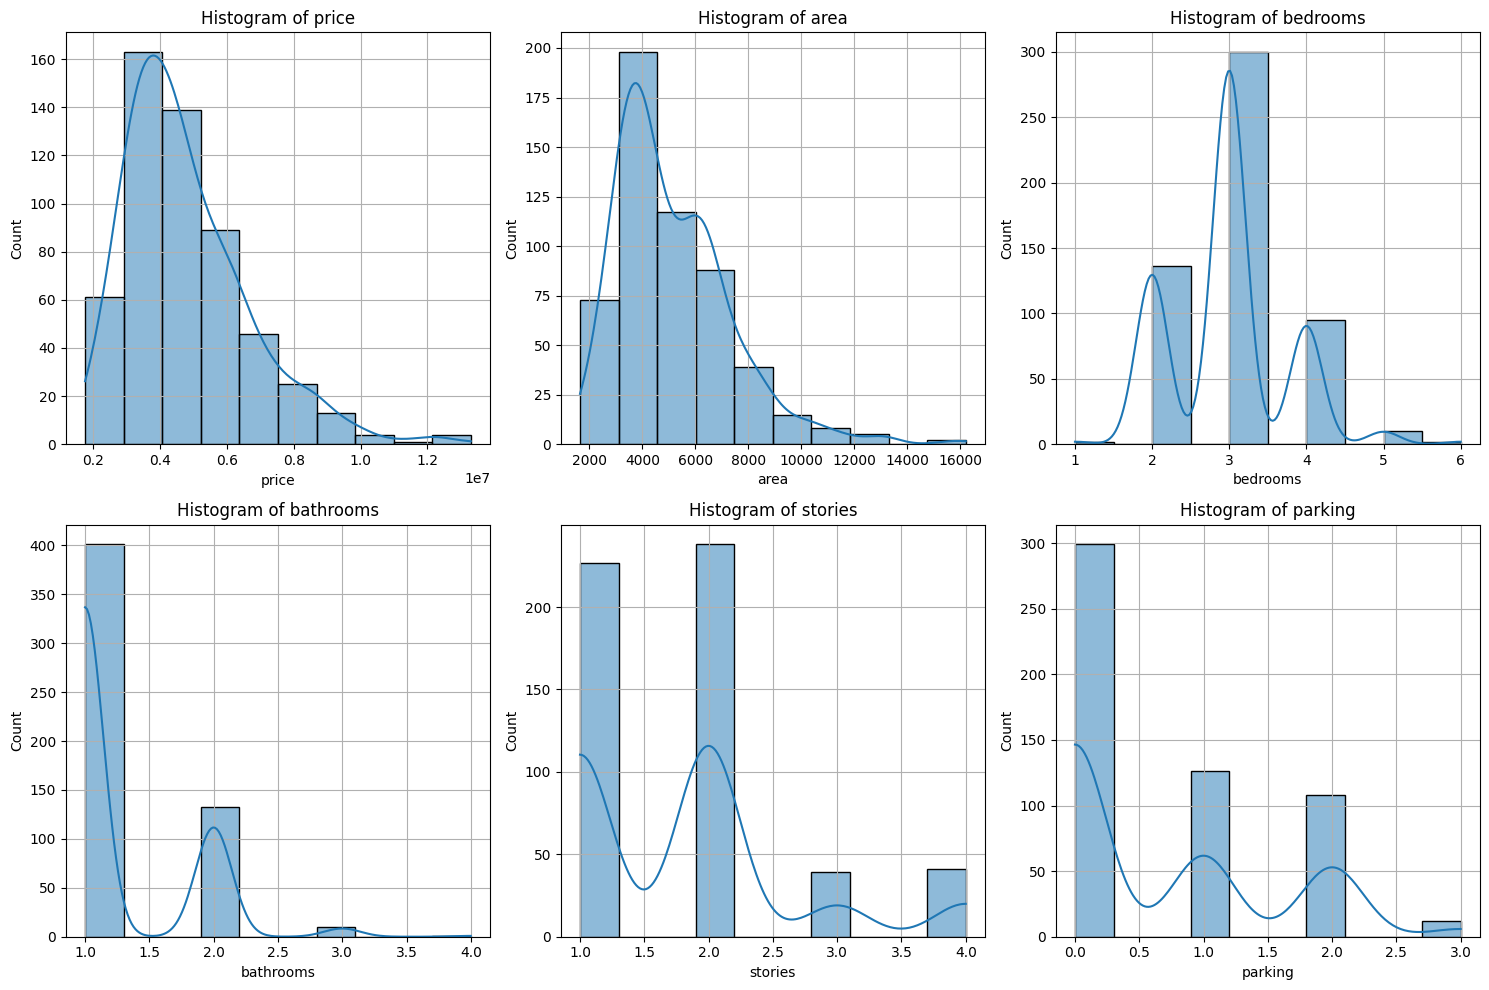

In [12]:
num_feature =  6
num_rows = (num_feature + 2) // 3 

plt.figure(figsize=(15,5*num_rows))

for i, feature in enumerate(Numerical):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(data=df, x=feature,kde=True,bins=10)
    plt.title(f'Histogram of {feature}')
    plt.grid()
plt.tight_layout() 
plt.show()

In [13]:
df[Numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


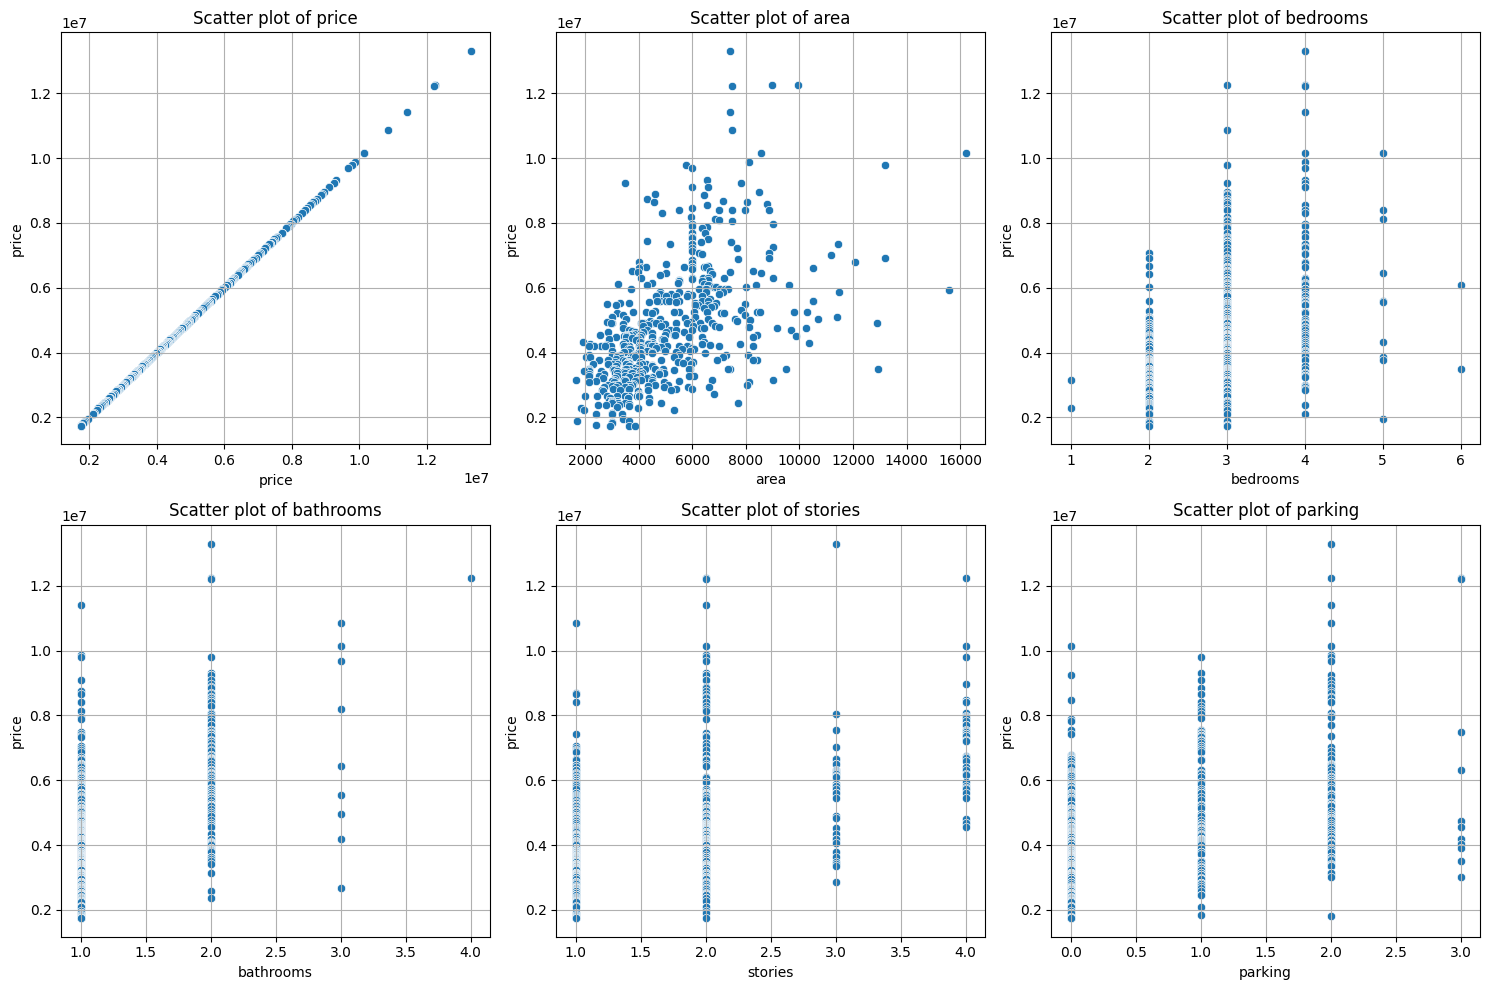

In [14]:
# Relationship between the dependent variable and Independent variable

num_feature =  6
num_rows = (num_feature + 2) // 3 

plt.figure(figsize=(15,5*num_rows))

for i, feature in enumerate(Numerical):
    plt.subplot(num_rows, 3, i+1)
    sns.scatterplot(data=df, x=feature, y ='price')
    plt.title(f'Scatter plot of {feature}')
    plt.grid()
plt.tight_layout() 
plt.show()

In [15]:
# Correlation - Numnerical Variables

df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Figure size 1000x500 with 0 Axes>

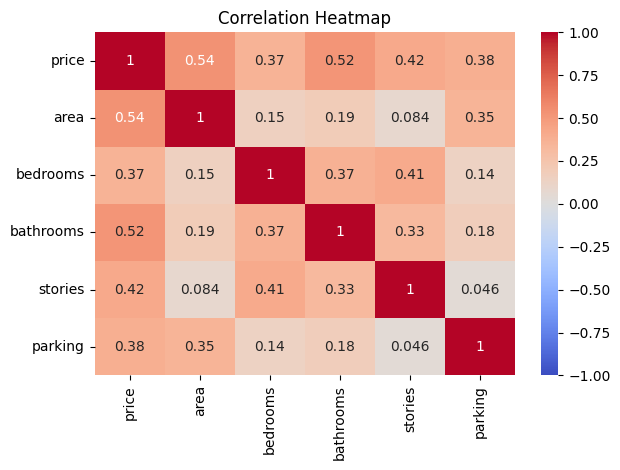

In [16]:
# Visualizing using heatmap
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot=True,cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
ax.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Analysing and visualising the Categoroical data

In [29]:
df[Categorical].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [38]:
percentage = df['mainroad'].value_counts(normalize=True)*100
percentage

yes    85.87156
no     14.12844
Name: mainroad, dtype: float64

In [54]:
labels = ['yes', 'no']

In [44]:
df.groupby(['mainroad'])['price'].mean()

mainroad
no     3.398905e+06
yes    4.991777e+06
Name: price, dtype: float64

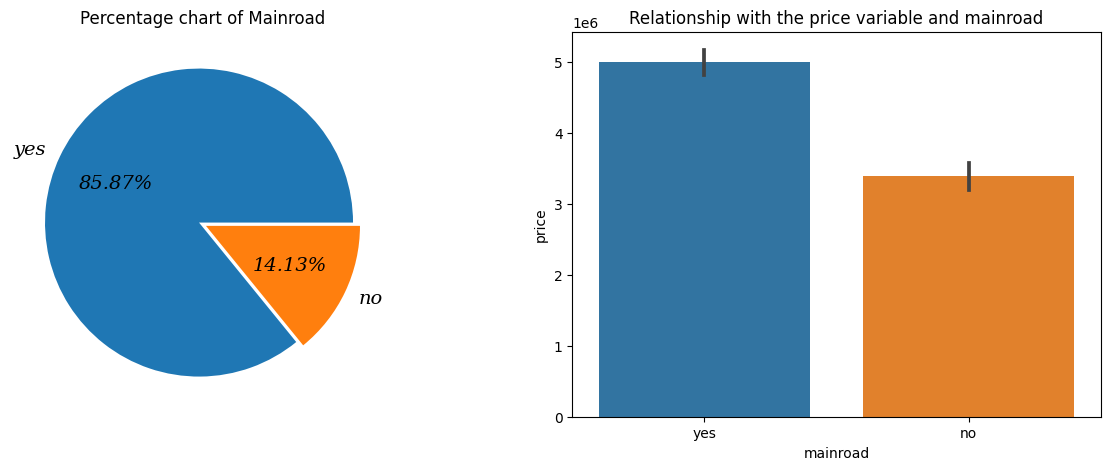

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(x=percentage, explode = [0.025, 0.025], 
        labels=labels, autopct='%.2f%%', textprops = {'fontsize' : 14, 'fontstyle' : 'oblique','fontfamily' : 'serif', 'fontweight' : 500})
plt.title('Percentage chart of Mainroad')
plt.subplot(1,2,2)
sns.barplot(data=df, x='mainroad', y = 'price')
plt.title('Relationship with the price variable and mainroad')
plt.show()

In [50]:
df['guestroom'].value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

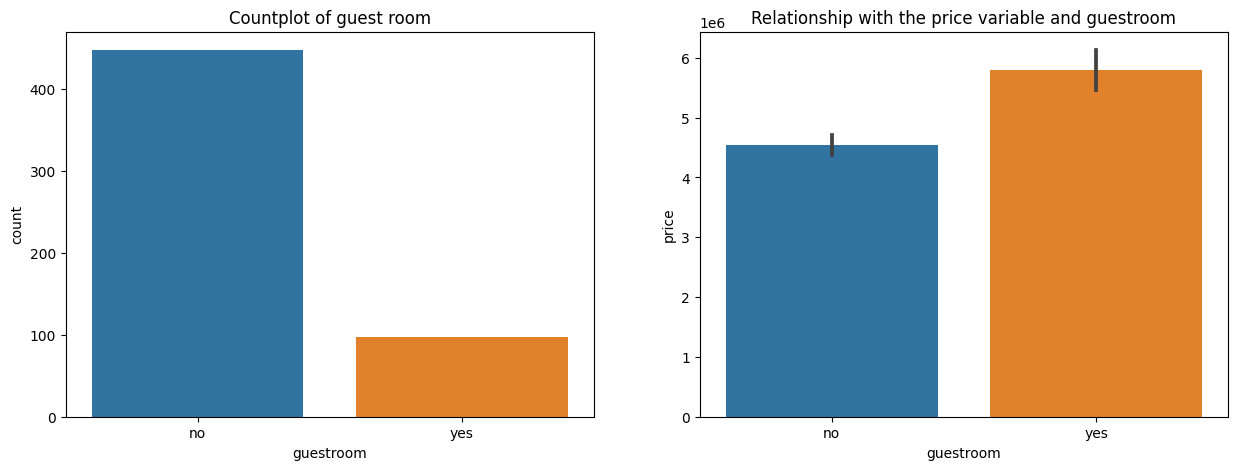

In [83]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='guestroom')
plt.title('Countplot of guest room')

plt.subplot(1,2,2)
sns.barplot(data=df, x='guestroom', y = 'price')
plt.title('Relationship with the price variable and guestroom')
plt.show()

In [53]:
df['basement'].value_counts()

no     354
yes    191
Name: basement, dtype: int64

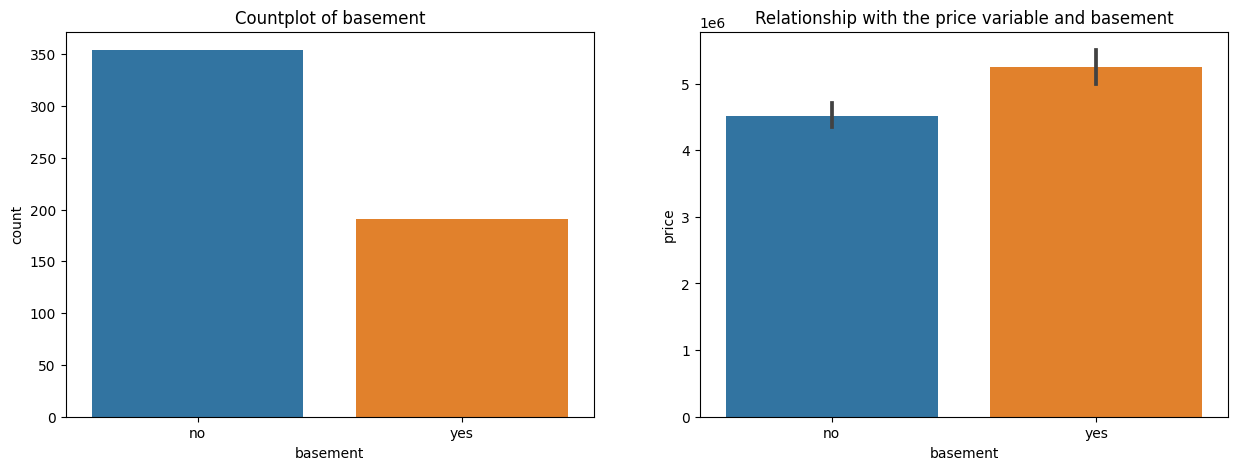

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data=df, x='basement')
plt.title('Countplot of basement')

plt.subplot(1,2,2)
sns.barplot(data=df, x='basement', y = 'price')
plt.title('Relationship with the price variable and basement')
plt.show()

In [75]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

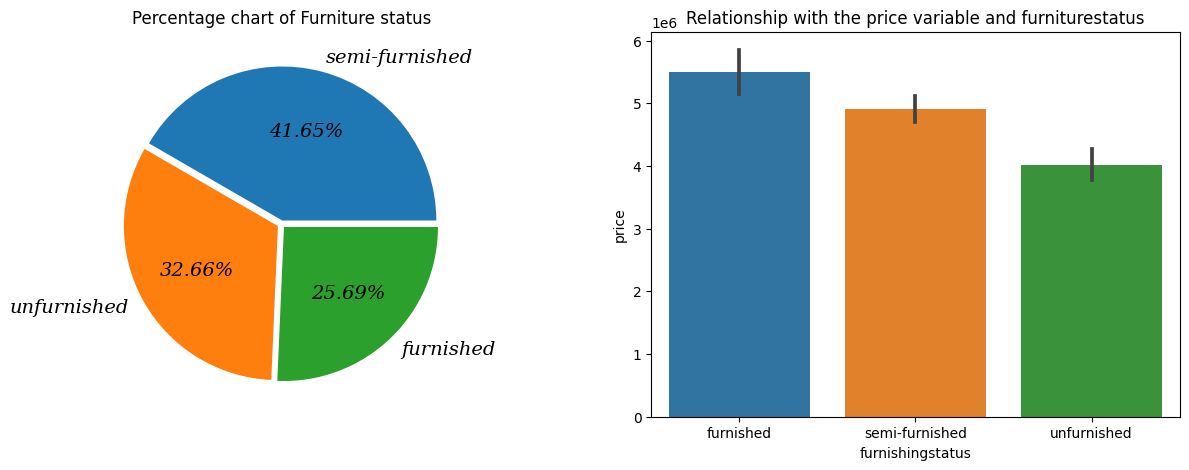

In [81]:
percentage_furniturestatus = df['furnishingstatus'].value_counts(normalize=True)*100
label = ['semi-furnished', 'unfurnished', 'furnished']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pie(x=percentage_furniturestatus, explode = [0.025, 0.025, 0.025], 
        labels=label, autopct='%.2f%%', textprops = {'fontsize' : 14, 'fontstyle' : 'oblique','fontfamily' : 'serif', 'fontweight' : 500})
plt.title('Percentage chart of Furniture status')
plt.subplot(1,2,2)
sns.barplot(data=df, x='furnishingstatus', y = 'price')
plt.title('Relationship with the price variable and furniturestatus')
plt.show()

In [105]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Bi Variante Analysis

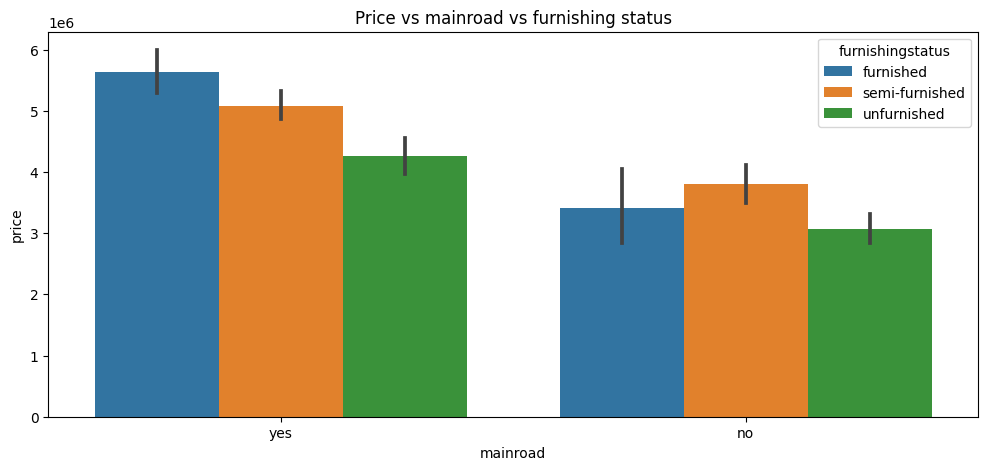

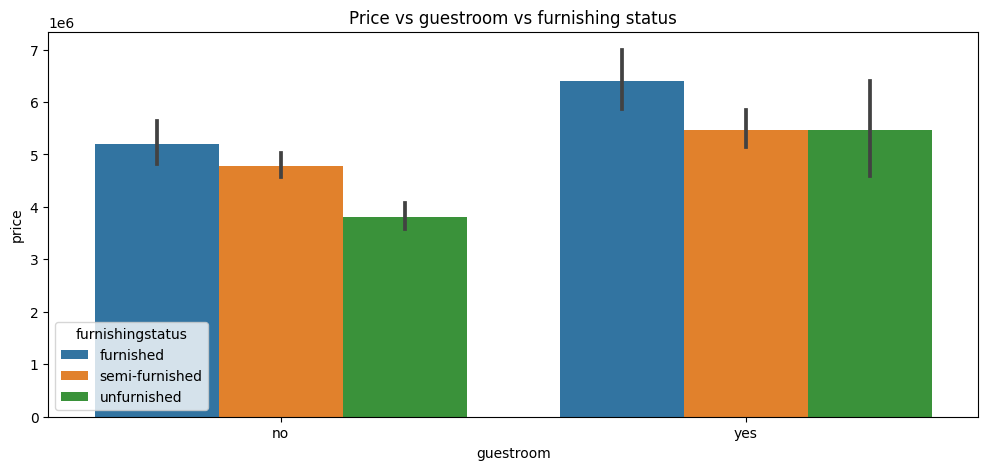

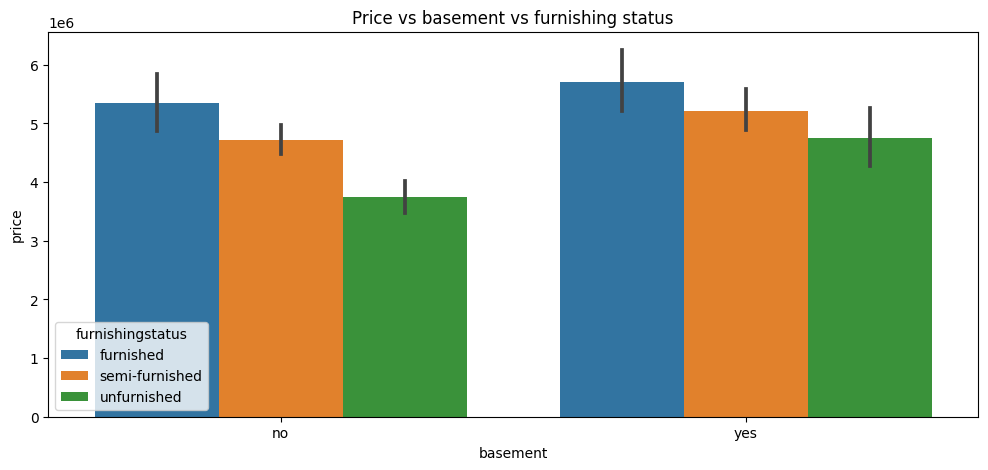

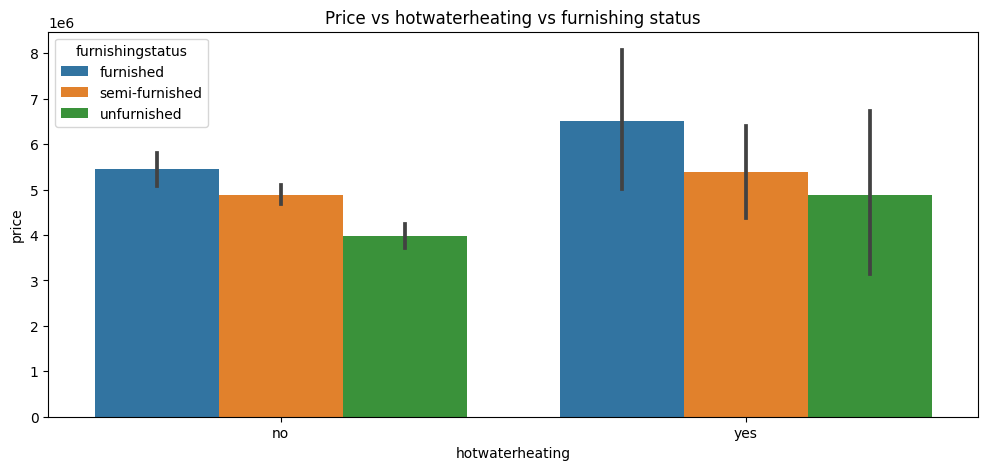

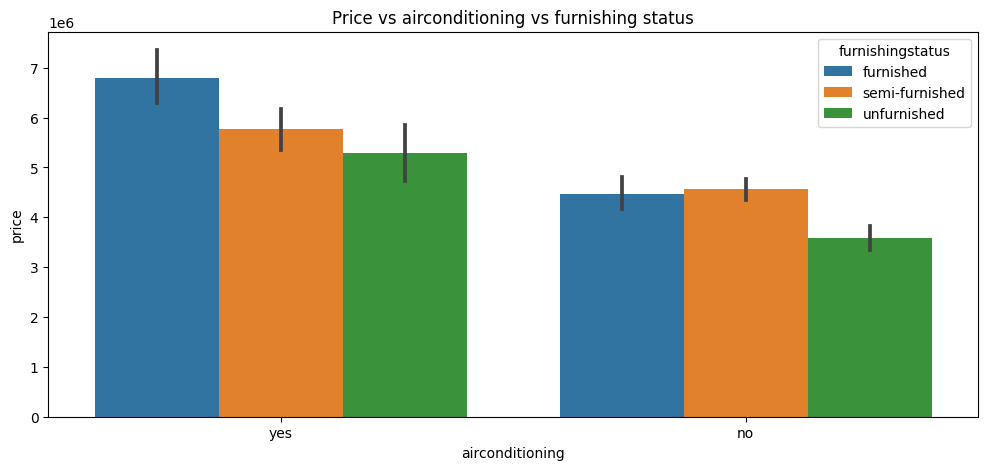

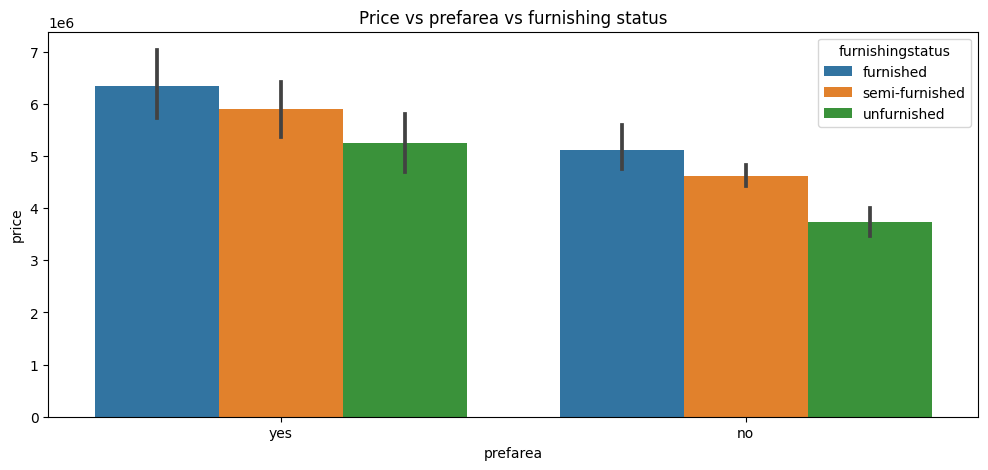

In [165]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        if feature == 'furnishingstatus':
            pass
        else:
            plt.figure(figsize=(12,5))
            sns.barplot(data=df, x=feature, y='price', hue='furnishingstatus')
            plt.title(f'Price vs {feature} vs furnishing status')
            print('\n')
plt.show()